# Q-Table Learning

In [2]:
import gym
import numpy as np

import matplotlib.pyplot as plt
# %matplotlib notebook

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
def plot_centiles(ss, xmax=0, smooth_factor=1, color="orange", ylabel="Steps", filename="plot"):

    if smooth_factor > 1:
        ns = []
        for ei in range(0, len(ss)):
            ne = smoothen(ss[ei], smooth_factor)
            ns.append(ne)
        ss = ns
    episode_length = len(ss[0])
    xs = np.linspace(0, episode_length - 1, episode_length)
    mins = np.min(ss, axis=0)
    maxs = np.max(ss, axis=0)
    q1s = np.percentile(ss, 25, axis=0)
    medians = np.percentile(ss, 50, axis=0)
    q3s = np.percentile(ss, 75, axis=0)

    bg_color = 'white'
    fg_color = 'black'
    fig = plt.figure(facecolor=bg_color, edgecolor=fg_color)
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor(bg_color)
    ax.xaxis.set_tick_params(color=fg_color, labelcolor=fg_color)
    ax.yaxis.set_tick_params(color=fg_color, labelcolor=fg_color)
    ax.spines['bottom'].set_color(fg_color)
    ax.spines['left'].set_color(fg_color)
    ax.spines['top'].set_color(bg_color)
    ax.spines['right'].set_color(bg_color)
    ax.xaxis.label.set_color(fg_color)
    ax.yaxis.label.set_color(fg_color)
    plt.grid(True)
    plt.xlabel('Episodes')
    plt.ylabel(ylabel)

    if color == "green":
        mean_color = 'seagreen'
        stdev_color = '#88ff99'
        maxmin_color = '#ccffdd'
    else:
        mean_color = '#ff8000'
        stdev_color = '#ffb266'
        maxmin_color = '#ffcc99'

    if xmax != 0:
        plt.gca().set_ylim(top=xmax)

    line1, = plt.plot(xs, medians, color=mean_color)
    line2, = plt.plot(xs, q3s, color=stdev_color)
    line3, = plt.plot(xs, q1s, color=stdev_color)
    line4, = plt.plot(xs, maxs, color=maxmin_color, alpha=0.5)
    line5, = plt.plot(xs, mins, color=maxmin_color, alpha=0.5)
    plt.fill_between(xs, medians, mins, facecolor=maxmin_color, alpha=0.8)
    plt.fill_between(xs, medians, maxs, facecolor=maxmin_color, alpha=0.8)
    plt.fill_between(xs, q1s, q3s, facecolor=stdev_color)
    plt.xticks(np.arange(0, num_episodes, step=num_episodes / 10))
    legend = plt.legend((line1, line2, line5), ('Median', 'Quartile 1/3', 'Maximum/Minimum'))
    for text in legend.get_texts():
        text.set_color(fg_color)
    frame = legend.get_frame()
    frame.set_facecolor(bg_color)
    frame.set_edgecolor(bg_color)
    plt.show()
    fig.savefig(filename + ".png", dpi=500, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())


def smoothen(l, f):
    nl = np.zeros(len(l) - f)
    for li in range(0, len(l) - f):
        nl[li] = np.mean(l[li:li + f])
    return nl

#### Q-Table Learning Algorithm

In [10]:
# Set learning parameters
alpha = .8
gamma = .95
epsilon = .1
num_trials = 10
num_episodes = 3000

esList = []
erList = []
for j in range(num_trials):
    # Initialize table with all zeros
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    sList = []
    rList = []
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        r = 0
        done = False
        steps = 0
        rtot = 0
        # The Q-Table learning algorithm
        while not done:

            # Choose an action by greedily (with noise) picking from Q table
            e = np.random.random()
            if e < epsilon:
                a = np.random.randint(0, env.action_space.n)
            else:
                row = Q[s, :]
                a = np.random.choice(np.argwhere(row == np.amax(row)).flatten())

            # Get new state and reward from environment
            s1, r, done, _ = env.step(a)

            # Update Q-Table with new knowledge
            Q[s, a] = Q[s, a] + alpha * (r + gamma * np.max(Q[s1, :]) - Q[s, a])

            # Update bookeeping and reduce exploration rate
            s = s1
            steps += 1
            rtot += r

        # Reduce exploration rate
        epsilon = 1. / ((i / 50) + 10)
        sList.append(steps)
        rList.append(rtot)

    esList.append(sList)
    erList.append(rList)

#### Reward

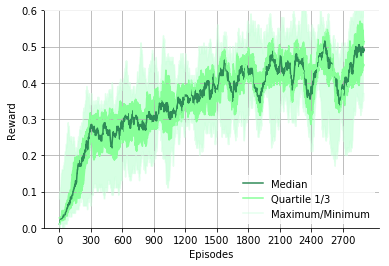

In [11]:
plot_centiles(erList, 0.6, smooth_factor=100, color="green", ylabel="Reward", filename="q-table-FrozenLake")

#### Number of Steps

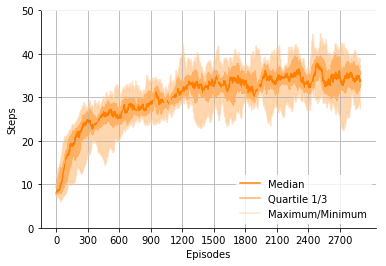

In [15]:
plot_centiles(esList, 50, smooth_factor=100, filename="q-table-FrozenLake-reward")